In [6]:
import skyfield
import json

from skyfield.api import load
from skyfield.data import hipparcos




In [3]:
with open ("DATA/constellation_hipnums.json", "r") as f:
    constellation_nums = json.load(f)

In [11]:
with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

In [19]:
for name, value in df.loc[6958].items():
    print(name, value)

magnitude 7.36
ra_degrees 22.38636559
dec_degrees -52.36611096
parallax_mas 1.87
ra_mas_per_year 27.67
dec_mas_per_year -9.26
ra_hours 1.4924243726666666
epoch_year 1991.25


In [34]:
#magnitude --> dynamics, volume
#distance from each other --> time between strikes (dragged stick)

#multiples --> multiple hits of the drum 

#spectral type --> type of hit (rudiment, I suppose? & handedness mapping)


In [22]:
_COLUMN_NAMES = (
    'Catalog', 'HIP', 'Proxy', 'RAhms', 'DEdms', 'Vmag',
    'VarFlag', 'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA',
    'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA',
    'Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA',
    'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag',
    'e_BTmag', 'VTmag', 'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V',
    'V-I', 'e_V-I', 'r_V-I', 'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat',
    'o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin', 'Period', 'HvarType',
    'moreVar', 'morePhoto', 'CCDM', 'n_CCDM', 'Nsys', 'Ncomp',
    'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho',
    'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
    'CPD', '(V-I)red', 'SpType', 'r_SpType',
)

def load_dataframe(fobj):
    """Given an open file for ``hip_main.dat``, return a parsed dataframe.

    If the file is gzipped, it will be automatically uncompressed.

    """
    try:
        from pandas import read_csv
    except ImportError:
        raise ImportError(PANDAS_MESSAGE)

    fobj.seek(0)
    magic = fobj.read(2)
    compression = 'gzip' if (magic == b'\x1f\x8b') else None
    fobj.seek(0)

    df = read_csv(
        fobj, sep='|', names=_COLUMN_NAMES, compression=compression,
        usecols=['HIP', 'Vmag', 'RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE',
                'CCDM', 'n_CCDM', 'Nsys', 'Ncomp', 'MultFlag', 'SpType' 
                ],
        na_values=['     ', '       ', '        ', '            '],
    )
    df.columns = (
        'hip', 'magnitude', 'ra_degrees', 'dec_degrees',
        'parallax_mas', 'ra_mas_per_year', 'dec_mas_per_year',
        'CCDM_Id', 'CCDM_History', "CCDM_N_Entries", "CCDM_N_Comp", 'Dbl_Mult_Annex', 'spectral_type',
    )
    df = df.assign(
        ra_hours = df['ra_degrees'] / 15.0,
        epoch_year = 1991.25,
    )
    return df.set_index('hip')

In [26]:
with load.open(hipparcos.URL) as f:
    df = load_dataframe(f)

In [28]:
df.loc[17717]

magnitude                   5.24
ra_degrees             56.915085
dec_degrees           -23.874796
parallax_mas               11.98
ra_mas_per_year            48.02
dec_mas_per_year           49.01
CCDM_Id                         
CCDM_History                    
CCDM_N_Entries                  
CCDM_N_Comp                    1
Dbl_Mult_Annex                  
spectral_type       A1V         
ra_hours                3.794339
epoch_year               1991.25
Name: 17717, dtype: object

In [169]:
#get list of all stars, flattened

all_hipps = []

for values in constellation_nums.values():
    for value in values:
        all_hipps.append(value)

In [174]:
all_magnitudes = []
all_mult = []
all_sptype = []

for hip in all_hipps:
    
    info = df.loc[hip]
    mag = info["magnitude"]
    mult = info["CCDM_N_Comp"]
    sptype = info["spectral_type"]
    
    all_magnitudes.append(mag)
    all_mult.append(mult)
    all_sptype.append(sptype)

In [175]:
all_mult.sort()

In [177]:
all_mult[0]

'  '

In [56]:
all_sptype[-1]

'WC8 + O9I   '

In [61]:
sptypes_simplified = []

types_seen = {
    
}

for type in all_sptype:
    
    sptypes_simplified.append(type[0])
    
    
    

In [62]:
types_seen

['A', 'B', 'F', 'G', 'K', 'M', 'O', 'W']

In [63]:
type_count = {}

for type in types_seen:
    type_count[type] = 0

In [65]:
for type in sptypes_simplified:
    type_count[type] += 1

In [66]:
type_count

{'A': 290, 'B': 258, 'F': 162, 'G': 163, 'K': 257, 'M': 70, 'O': 10, 'W': 1}

In [67]:
sum = 0
for type, num in type_count.items():
    sum += num
print(sum)

1211


In [37]:
all_magnitudes.sort()

In [41]:
import matplotlib.pyplot as plt
import numpy as np

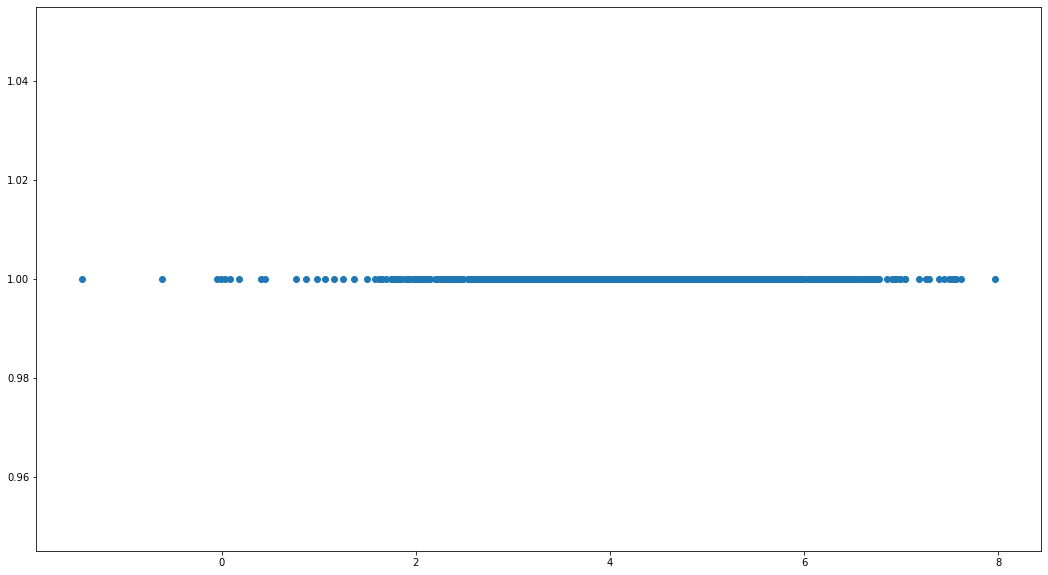

In [46]:
fig, ax = plt.subplots(figsize=(18, 10))

y = np.ones(len(all_magnitudes))

ax.scatter(all_magnitudes, y)

In [43]:
x

array([1., 1., 1., ..., 1., 1., 1.])

# get distances

In [77]:
def setup():
    
    #load info
    eph = load('de421.bsp') 
    with load.open(hipparcos.URL) as f:
        all_stars = = load_dataframe(f)
        
    #create sun, earth, and moon 
    sun = eph['sun']
    earth = eph['earth']
    moon = eph['moon']
    
    #create timescale
    ts = load.timescale()
    
    return eph, all_stars, sun, earth, moon, ts






def set_location(lat, latD, lon, lonD, elevation_m):
    #create location
    
    location = earth + wgs84.latlon(lat * latD, lon * lonD, elevation_m=elevation_m)
    
    return location






def make_star(hipp_num, all_stars):
    
    star = Star.from_dataframe(all_stars.loc[hipp_num])
    
    return star


def altaz_to_polar(alt, az):
    
    #stereographic projection
    
    if alt >= 0:
        r = np.sin(alt + np.pi/2) / (1 - np.cos(alt + np.pi/2))
    else:
        r = -(alt) / (np.pi/2) + 1
         
    theta = az
    
    return r, theta


def make_constellation(all_stars, hipps):
    
    const = []
    for hip in hipps:
        #print(hip)
        star = make_star(hip, all_stars)
        
        const.append(star)
        #print(star)
        
    return const
    


def get_object_info(obj, location, time):
    
    #get alt, az, and dist of specified object at particular time & place 
    #time as ts.utc()
    
    obj_observe = location.at(time).observe(obj)
    obj_app = obj_observe.apparent()
    
    alt, az, dist = obj_app.altaz()
    
    return alt, az, dist

    
def get_constellations(all_stars, const_hipps):
    
    #make stars for all constellations and put into dictionary based on const name 
    
    consts = {}
    for key, value in const_hipps.items():
        consts[key] = make_constellation(all_stars, value)
    
    return consts

SyntaxError: invalid syntax (3295998577.py, line 6)

In [78]:
#SETUP

from skyfield.api import Star, load, N,S,E,W, wgs84
from skyfield.data import hipparcos
from skyfield import almanac

eph, all_stars, sun, earth, moon, ts = setup() #load setup stuff

kaifeng = set_location(34.795, N, 114.345, E, 75) #set locations
northpole = set_location(90, N, 135, W, 147)

constellations = get_constellations(all_stars, constellation_nums) #make all constellations




In [79]:
curv = constellations["P-5-curvedarray"]

In [85]:
#check if dstancces aare constant with time 

star1 = curv[0]

alt1, az1, dist1 = get_object_info(star1, kaifeng, times[0])
alt2, az2, dist2 = get_object_info(star1, kaifeng, times[1])

In [82]:
import pickle
with open("DATA/times.pickle", "rb") as f:
    times = pickle.load(f)

In [95]:
from skyfield.trigonometry import position_angle_of

In [109]:
distances = {}

for name in constellations.keys():
    distances[name] = []
    
    
for name, stars in constellations.items():
    
    #print(name)
    
    stars_observe = []
    
    for star in stars:
        observe = kaifeng.at(times[0]).observe(star)
        app = observe.apparent()
        
        stars_observe.append(app)
        
    dists = []
    for i in range(1, len(stars)):
        this_observe = stars_observe[i]
        prev_observe = stars_observe[i-1]
        
        v = this_observe - prev_observe
        dist = v.distance()
        dists.append(dist)
    
    distances[name] = dists

#     stars_altaz = []
    
#     for star in stars:
#         altaz = (get_object_info(star, kaifeng, times[0]))
#         stars_altaz.append(altaz)
        
#     for i in range(1, len(stars)):
#         this_altaz = stars_altaz[i]
#         prev_altaz = stars_altaz[i-1]
        
#         this_dist = this_altaz[2].m
#         prev_dist = prev_altaz[2].m
        
#         pos_angle = separation_from(this_altaz, prev_altaz).radians
        
#         print(pos_angle)

In [112]:
#now, look at all distances and compare.....
all_dists = []

for values in distances.values():
    for value in values:
        all_dists.append(value.au)

In [113]:
all_dists.sort()

In [115]:
all_dists[-1]

206264802150702.1

In [118]:
shorter_dists = []
longer_dists = []
for dist in all_dists:
    if dist <= 1e14:
        shorter_dists.append(dist)
    else:
        longer_dists.append(dist)

In [121]:
len(longer_dists)

6

In [124]:
for dist in longer_dists:
    for name, dists in distances.items():
        for distance in dists:
            if dist == distance.au:
                print(name)

W-48-chief
B-63-measure
W-48-chief
B-57-tail
B-57-tail


In [125]:
longer_dists

[206264722403124.7,
 nan,
 206264691803678.12,
 206264756547021.9,
 206264801727951.2,
 206264802150702.1]

In [126]:
distances["B-63-measure"]

[<Distance 2.06265e+14 au>,
 <Distance 1.10974e+08 au>,
 <Distance 1.77346e+07 au>,
 <Distance 3.45493e+07 au>,
 <Distance 2.89711e+07 au>,
 <Distance 1.27681e+06 au>,
 <Distance 4.05666e+07 au>]

In [128]:
from math import log10, floor

def find_exp(number) -> int:
    base10 = log10(abs(number))
    return abs(floor(base10))

In [129]:
dist_exps = []

for dist in shorter_dists:
    exp = find_exp(dist)
    
    dist_exps.append(exp)

In [131]:
exps_nums = {5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

for dist in dist_exps:
    exps_nums[dist] += 1

In [132]:
exps_nums

{5: 43, 6: 372, 7: 452, 8: 37, 9: 4}

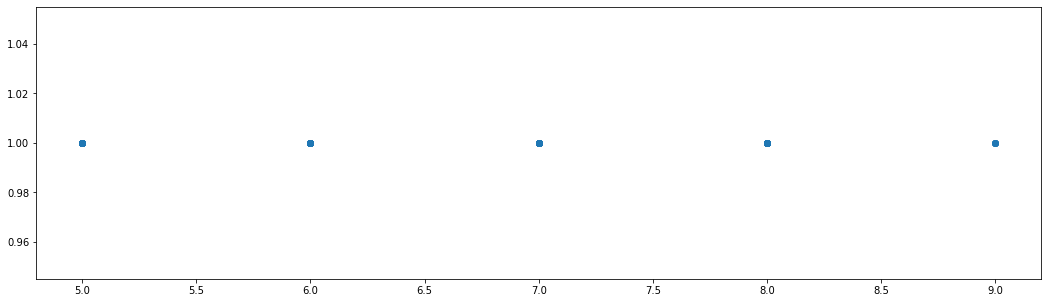

In [130]:
y = np.ones(len(shorter_dists))

fig, ax = plt.subplots(figsize = (18, 5))

ax.scatter(dist_exps, y)

In [108]:
for name in constellations.keys():
    stars = constellations[name]
    dists = distances[name]

P-25-eunuch [] []
P-35-advise [] []
B-61-fish [] []
K-32-standard [] []
K-75-horses [] []
R-40-millet [] []
R-43-temple [] []
R-32-UNK [] []
R-54-vessel [] []
R-63-overpot [] []
R-64-cupboard [] []


In [ ]:
#magnitude --> dynamics, volume
    #SIZE of star 
    
#distance from each other --> time between strikes (dragged stick)
    #number of lines btwn stars 

#multiples --> multiple hits of the drum 
    #concentric circles within star

#spectral type --> type of hit (rudiment, I suppose? & handedness mapping)
    #type of dot 

In [186]:
score_info = {}

for name in constellations.keys():
    score_info[name] = {
    
    #for making nice info charts later...
    "hips": [],
    "ras": [],
    "decs": [], 
    #also probably want common greek name, if applicable 
    
    #for making scores now 
    "mags": [],
    "stypes": [],
    "mults": [], 
    "dists": [], 
    "common_name": "", 
}
    score_info[name]["hips"] = constellation_nums[name]

In [187]:
for name, starnums in constellation_nums.items():
     
    for star in starnums:
        hip_info = df.loc[star]
        score_info[name]["ras"].append(hip_info["ra_degrees"])
        score_info[name]["decs"].append(hip_info["dec_degrees"])
    
        score_info[name]["mags"].append(hip_info["magnitude"])
        score_info[name]["stypes"].append(hip_info["spectral_type"])
        score_info[name]["mults"].append(hip_info["CCDM_N_Comp"])
        
        

In [188]:
#get distance info 
for name, stars in constellations.items():
    
    #print(name)
    
    stars_observe = []
    
    for star in stars:
        observe = kaifeng.at(times[0]).observe(star)
        app = observe.apparent()
        
        stars_observe.append(app)
        
    for i in range(1, len(stars)):
        this_observe = stars_observe[i]
        prev_observe = stars_observe[i-1]
        
        v = this_observe - prev_observe
        dist = v.distance()
        score_info[name]["dists"].append(dist)


In [189]:
score_info

{'P-7-northpole': {'hips': [75097, 72607, 70692, 69112, 62561],
  'ras': [230.1822884, 222.67664751, 216.88134383, 212.21253759, 192.2782968],
  'decs': [71.83397308, 74.15547596, 75.69593921, 77.54743312, 83.41779443],
  'mags': [3.0, 2.07, 4.25, 4.8, 5.92],
  'stypes': ['A3II-III    ',
   'K4IIIvar    ',
   'K4III       ',
   'K3III       ',
   'A0V         '],
  'mults': [' 1', ' 1', ' 1', ' 1', ' 1'],
  'dists': [<Distance 2.23967e+07 au>,
   <Distance 1.38149e+07 au>,
   <Distance 9.88073e+06 au>,
   <Distance 1.77541e+07 au>],
  'common_name': ''},
 'P-6-fourad': {'hips': [51384, 51502, 47193],
  'ras': [157.42586771, 157.77091914, 144.27229969],
  'decs': [84.25210531, 82.55853791, 81.32642085],
  'mags': [5.52, 5.25, 4.28],
  'stypes': ['F0IV        ', 'F2V         ', 'K3III       '],
  'mults': [' 1', ' 1', ' 1'],
  'dists': [<Distance 3.98421e+06 au>, <Distance 6.36459e+07 au>],
  'common_name': ''},
 'P-5-curvedarray': {'hips': [77055, 82080, 85822, 11767, 5372, 113116],
  '

In [190]:
from astroquery.simbad import Simbad

In [217]:
#get names from Simbad

for const_name, hips in constellation_nums.items():
    
    names = [] 
    for hip in hips:
        query_string = "HIP " + str(hip)
        #print(query_string)
        
        result_table = Simbad.query_objectids(query_string)
        
        name_string = ""
        for result in result_table:
            info = result[0]
            if "NAME" in info or "*" in info and "**" not in info: 
                name_string += info + " \n"
                
        names.append(name_string)
    score_info[const_name]["common_name"] = names
    print(const_name, names)

P-7-northpole ['* gam UMi \n*  13 UMi \nV* gam UMi \nSV* ZI  1129 \nNAME Pherkad \n', '*   7 UMi \n* bet UMi \nNAME Kochab \nSV* ZI  1097 \n', '*   5 UMi \n', '*   4 UMi \n', '']
P-6-fourad ['', '', '']
P-5-curvedarray ['* zet UMi \n*  16 UMi \nSV* ZI  1173 \n', '* eps UMi \n*  22 UMi \nV* eps UMi \n', '* del UMi \n*  23 UMi \nNAME Yildun \n', 'NAME Lodestar \n*   1 UMi \n* alf UMi \nNAME Polaris \nV* alf UMi \nNAME North Star \n', '*   2 UMi \n', '']
P-4-greatemp ['']
P-15-celestpill ['*  76 Dra \n', '*  77 Dra \n', '*  69 Dra \n', '*  59 Dra \n', '*  40 Dra \n']
P-13-maids ['* tau Dra \n*  60 Dra \n', '*  50 Dra \n', '*  29 Dra \nV* DR Dra \n']
P-17-sixjia ['NAME 23 H. Cam \n', '', '', 'V* VZ Cam \n', '', '']
P-14-offarchs ['*  43 Dra \n* phi Dra \nSV* ZI  1408 \nV* phi Dra \n']
P-12-fivesecr ['* f Dra \n*  27 Dra \n', '*  15 Dra \n', '* g Dra \n*  18 Dra \n', '', '* h Dra \n*  19 Dra \n']
P-10-celestbed ['', '', '', '', 'V* RR UMi \n', '*   6 UMi \n']
P-11-bigjudge ['* eta Dra \n*  

B-65-peasant ['']
B-27-lance ['* gam Boo \n*  27 Boo \nV* gam Boo \nNAME Seginus \n']
B-63-measure ['*  63 Oph \n', '', '*  58 Oph \n', '*   2 Sgr \n', '*  52 Oph \nV* V2125 Oph \n', '* c Oph \n*  51 Oph \nEM* CDS  914 \n', '', '*   3 Sgr \nV* X Sgr \n']
K-13-measure ['* phi Sgr \n*  27 Sgr \n', '* lam Sgr \n*  22 Sgr \nNAME Kaus Borealis \n', '* mu. Sgr \n*  13 Sgr \nEM* MWC  598 \nV* mu. Sgr \nNAME Polis \n', '* sig Sgr \n*  34 Sgr \nNAME Nunki \n', '* tau Sgr \n*  40 Sgr \n', '*  38 Sgr \n* zet Sgr \nNAME Ascella \n']
K-9-helmet ['* alf Sct \n*   1 Aql \n', '*   2 Sct \n* del Sct \nSV* P  4827 \nV* del Sct \n*   2 Aql \n', '* eps Sct \n*   3 Aql \n', '* bet Sct \n*   6 Aql \n', '* eta Sct \n*   9 Aql \n', '* i Aql \n*  12 Aql \nSV* ZI  1577 \n']
K-12-constr ['*  37 Sgr \n* ksi02 Sgr \n', '* omi Sgr \n*  39 Sgr \n', '* pi. Sgr \n*  41 Sgr \nNAME Albaldah \n', '* d Sgr \n*  43 Sgr \n', '* rho01 Sgr \n*  44 Sgr \nV* rho01 Sgr \n', 'V* ups Sgr \n* ups Sgr \n*  46 Sgr \nEM* MWC  313 \n']

W-3-general ['* gam And \nNAME Almach \n* gam And A \n*  57 And A \n* gam01 And \n', '* phi Per \nEM* MWC   16 \nV* phi Per \n*  54 And \n', '* ups Per \n*  51 And \nNAME Nembus \n', '*  49 And \n', '* chi And \n*  52 And \n', '* ups And \n*  50 And \nNAME Titawin \n', '* tau And \n*  53 And \nSV* ZI    87 \n', 'Cl* NGC  752    PLA     446 \n*  56 And \n', '*   4 Tri \n* bet Tri \n', '* gam Tri \n*   9 Tri \n']
W-6-rightwatch ['* rho Psc \n*  93 Psc \nSV* ZI    71 \n', '* eta Psc \n*  99 Psc \nSV* ZI    79 \nNAME Alpherg \n', '* 102 Psc \n* pi. Psc \n', '* 110 Psc \n* omi Psc \nNAME Torcular \n', '* 104 Psc \n']
W-12-leftwatch ['*  32 Ari \n* nu. Ari \n', '*  34 Ari \n* mu. Ari \n', '* omi Ari \n*  37 Ari \n', '* sig Ari \n*  43 Ari \n', '*  42 Ari \n* pi. Ari \nSV* ZI   154 \n']
W-9-granary ['*   8 Cet \n* iot Cet \n', '* eta Cet \n*  31 Cet \n', '* tet Cet \n*  45 Cet \n', '* zet Cet \n*  55 Cet \nSV* ZI    96 \nNAME Baten Kaitos \n', '* tau Cet \n*  52 Cet \n', '*  57 Cet \n']
W-14-

W-37-crimemin ['* 139 Tau \n', '*   1 Gem \n', '*  62 Ori \n* chi02 Ori \nEM* MWC  132 \nSV* ZI   508 \nV* chi02 Ori \n', '* chi01 Ori \n*  54 Ori \nV* chi01 Ori \n']
W-31-flags ['*  57 Aur \n* psi06 Aur \n', '*  16 Lyn \n* psi10 Aur \n', '*  55 Aur \n* psi04 Aur \n', '*  56 Aur \n* psi05 Aur \n', '*  50 Aur \n* psi02 Aur \n', '*  58 Aur \n* psi07 Aur \n', '*  52 Aur \n* psi03 Aur \n', '*  51 Aur \n', '*  59 Aur \nV* OX Aur \n']
W-48-chief ['* zet Ori \n*  50 Ori \nNAME Alnitak \nEM* MWC  509 \n', '* eps Ori \n*  46 Ori \nEM* MWC  504 \nNAME Alnilam \nV* eps Ori \n', 'V* del Ori \nNAME Mintaka \n* del Ori \n*  34 Ori \n* del01 Ori \n', '*  58 Ori \n* alf Ori \nNAME Betelgeuse \nV* alf Ori \n', '* gam Ori \n*  24 Ori \nNAME Bellatrix \nSV* ZI   374 \n', '*  53 Ori \n* kap Ori \nNAME Saiph \nSV* ZI   484 \n', '* bet Ori \n*  19 Ori \n* bet Ori A \nEM* MWC  487 \nSV* ZI   362 \nV* bet Ori \nNAME Rigel \n', '*  42 Ori \n* c Ori \nSV* ZI   431 \n', '* tet01 Ori A \n*  41 Ori A \nV* V1016 Or

In [218]:
score_info

{'P-7-northpole': {'hips': [75097, 72607, 70692, 69112, 62561],
  'ras': [230.1822884, 222.67664751, 216.88134383, 212.21253759, 192.2782968],
  'decs': [71.83397308, 74.15547596, 75.69593921, 77.54743312, 83.41779443],
  'mags': [3.0, 2.07, 4.25, 4.8, 5.92],
  'stypes': ['A3II-III    ',
   'K4IIIvar    ',
   'K4III       ',
   'K3III       ',
   'A0V         '],
  'mults': [' 1', ' 1', ' 1', ' 1', ' 1'],
  'dists': [<Distance 2.23967e+07 au>,
   <Distance 1.38149e+07 au>,
   <Distance 9.88073e+06 au>,
   <Distance 1.77541e+07 au>],
  'common_name': ['* gam UMi \n*  13 UMi \nV* gam UMi \nSV* ZI  1129 \nNAME Pherkad \n',
   '*   7 UMi \n* bet UMi \nNAME Kochab \nSV* ZI  1097 \n',
   '*   5 UMi \n',
   '*   4 UMi \n',
   '']},
 'P-6-fourad': {'hips': [51384, 51502, 47193],
  'ras': [157.42586771, 157.77091914, 144.27229969],
  'decs': [84.25210531, 82.55853791, 81.32642085],
  'mags': [5.52, 5.25, 4.28],
  'stypes': ['F0IV        ', 'F2V         ', 'K3III       '],
  'mults': [' 1', ' 1'

In [229]:
with open("DATA/score_info.json", "w") as f:
    json.dump(score_info, f)

In [227]:
for name, info in score_info.items():
    
    for i in range(len(info["dists"])):
        dist = info["dists"][i].au
        info["dists"][i] = dist